In [1]:
# Add the path to the slack-pack/code/ folder in order to be able to import nlp module
import sys, os

NLP_PATH = '/'.join(os.path.abspath('.').split('/')[:-1]) + '/'
sys.path.append(NLP_PATH)
print NLP_PATH

/Users/Alex/Documents/Berkeley/1603Fall/W210/GitHub/slack-pack/code/


### Visualizing Topics

In [2]:
def print_this(someting):
    re

In [3]:
%matplotlib inline
import cPickle as pk

/Users/Alex/miniconda2/envs/nlp/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### Loading a saved window

In [4]:
with open('../nlp/data/windows/alex_new_config_window.pk', 'rb') as f:
    WINDOW = pk.load(f)

In [5]:
WINDOW.report_topics()

Window has #4 topics

Topic length report:
  Topic # 0  --> size: 10 
  Topic # 1  --> size: 1  
  Topic # 2  --> size: 10 
  Topic # 3  --> size: 1  


First let's generate the corpus from which we will build all the visualizations.

In [6]:
from nlp.text.corpus import Corpus, from_window
from nlp.grammar.tokenizer import SimpleCleaner

In [7]:
corpus = from_window(WINDOW, cleaner=SimpleCleaner())

Perfect, now let's get a-viz-ing!



### Wordcloud

In [8]:
from nlp.models.summarization import TFIDF
from nlp.viz.cloud import Wordcloud

In [9]:
# alex's addition
model = TFIDF(window=WINDOW)
print model

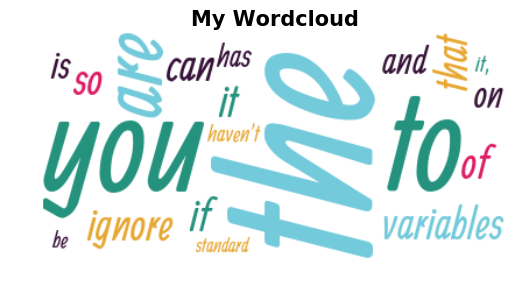

In [21]:
fontPath = NLP_PATH+"nlp/data/font/Ranga-Regular.ttf"
wordcloud = Wordcloud(model, 2, max_words=20, font=fontPath)  # defaults to 10 words
wordcloud.show('My Wordcloud')

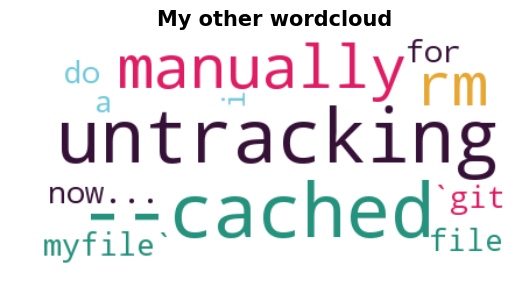

In [12]:
wordcloud = Wordcloud(model, 1, max_words=12)
wordcloud.show('My other wordcloud')

#### Saving the wordcloud

In [ ]:
IMG_FOLDER = '../nlp/data/img/'
wordcloud.save_png(IMG_FOLDER + 'new_wordcld.png')

## ALEX PLAYING AROUND WITH COLOR


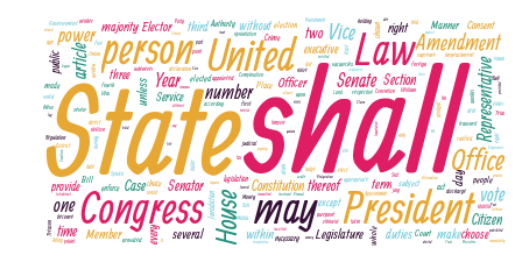

In [39]:
from os import path
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random


NLP_PATH = '/'.join(os.path.abspath('.').split('/')[:-1]) + '/'

d = NLP_PATH+"nlp/data/corpora/"

FONT_PATH = d + "Ranga-Regular.ttf"

# Read the whole text.
text = open(path.join(d, 'constitution.txt')).read()
wordcloud = WordCloud(font_path=FONT_PATH,background_color="#FFFFFF").generate(text)

# create a recoloring function
def slack_colorize(word, font_size, position, orientation, random_state=None, **kwargs):
    
    # slack colors
    slack_colors = ["#361137","#DE1D64","#24927D","#72CADB","#E7A733"]
    
    # generate a random number between 0 and 4 (inclusive)
    rand_int = random.randint(0,len(slack_colors)-1)
    
    return slack_colors[rand_int]

wordcloud.recolor(color_func=slack_colorize)

# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()